# Lesson L2 – Visualizing Word Frequencies 🔍📊  

Welcome to **Lesson L2** of the DeepLearning.AI NLP Specialization remake!  

## What you’ll learn  
* **Build** a frequency dictionary from text  
* **Interpret** what “word frequency” tells us about a corpus  
* **Visualize** frequencies with bar charts & word clouds  
* **Explore** your own texts interactively with a Gradio app  

## Why does this matter?  
Word frequencies are the *hello world* of NLP analysis.  
They underpin language modelling, sentiment analysis, TF‑IDF, and more.  
Before diving into complex models, you should be comfortable asking:  

> *“Which words appear most, and why?”*  

## Roadmap  
1. **Setup & installs** – everything runs in Colab with one click  
2. **Toy example** – three tiny sentences to build intuition  
3. **Real dataset** – 10 k tweets from NLTK  
4. **Visualisations** – bar plots and word clouds  
5. **Gradio playground** – experiment live with your own text  

_👉 Let’s get started!_

In [1]:
# 🍀 Colab setup – run this first!
!pip -q install nltk wordcloud gradio==4.12.0 --progress-bar off

import nltk, ssl, os
# Ensure SSL context for nltk downloader (occasional Colab issue)
try:
    _create_unverified_https_context = ssl._create_unverified_context
    ssl._create_default_https_context = _create_unverified_https_context
except AttributeError:
    pass

# Download required NLTK resources
for resource in ['stopwords', 'punkt', 'twitter_samples']:
    nltk.download(resource, quiet=True)

# 🔧 Patch for some NLTK versions that look for 'punkt_tab'
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    try:
        nltk.download('punkt_tab', quiet=True)
    except:
        pass

print('✅ NLTK data ready!')

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataproc-spark-connect 0.8.2 requires websockets>=14.0, but you have websockets 11.0.3 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
google-genai 1.25.0 requires websockets<15.1.0,>=13.0.0, but you have websockets 11.0.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6

## 1️⃣ Toy example – build intuition  

We’ll start with **three micro‑sentences** so you can see every step. We will now tokenize the words in these 3 sentences and show their frequency in a counter chart. Later we will show frequencies for positive and negative sentiment Tweets (pre-filtered), but for now we'll just focus on counts.

Frequencies: Counter({'nlp': 2, 'loves': 2, 'python': 2, '.': 2, 'i': 1, 'love': 1, '!': 1, 'you': 1})


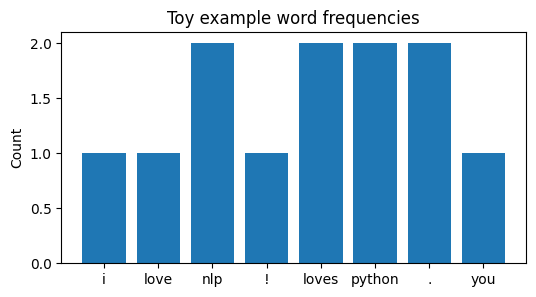

In [2]:
from collections import Counter
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

toy_sentences = [
    "I love NLP!",
    "NLP loves Python.",
    "Python loves you."
]

# Tokenise & lowercase
tokens = [w.lower() for s in toy_sentences for w in word_tokenize(s)]
freq = Counter(tokens)

print("Frequencies:", freq)

# 📊 bar plot
plt.figure(figsize=(6,3))
plt.bar(freq.keys(), freq.values())
plt.title("Toy example word frequencies")
plt.ylabel("Count")
plt.show()

**What happened?**  
* We tokenised sentences with `word_tokenize`.  
* Lower‑cased everything so “Python” and “python” merge.  
* Counted with `Counter`.  
* Visualised counts.  

With just three lines you already have a **corpus fingerprint**!

## 2️⃣ Utility functions

These pre-programmed functions are now built in the Colab environment. In the DeepLearning.ai course they come pre-programmed in a utils.py file.

process_tweet() is a function using sevearl ntlk components that takes a raw tweet and returns a list of stemmed tokens by lowercasing, removing URLs and punctuation, filtering out stop-words, and applying stemming.

build_freqs() creates a dictionary that maps each (word, label) pair (e.g., ('love', 1)) to the number of times it appears in a labeled tweet corpus.

In [3]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def process_tweet(tweet: str):
    """Clean, tokenize, remove stop‑words & stem."""
    tweet = tweet.lower()
    tweet = re.sub(r'https?://\S+', '', tweet)          # remove urls
    tweet = re.sub(r'[^a-z\s]', '', tweet)              # keep letters & space
    tokens = [stemmer.stem(w) for w in tweet.split() if w not in stop_words]
    return tokens

def build_freqs(tweets, ys):
    """Build (word, label) -> freq dict."""
    freqs = {}
    for y, tweet in zip(ys, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            freqs[pair] = freqs.get(pair, 0) + 1
    return freqs

## 3️⃣ Real‑world dataset – 10 k tweets  

We’ll reuse NLTK’s **twitter_samples** (5 k positive + 5 k negative). This set comes pre-filtered with 5k of each positive and negative Tweets.

In [4]:
from nltk.corpus import twitter_samples
import numpy as np

pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('negative_tweets.json')

tweets = pos_tweets + neg_tweets
ys = np.append(np.ones(len(pos_tweets)), np.zeros(len(neg_tweets)))

print(f"{len(tweets)} tweets loaded")

freqs = build_freqs(tweets, ys)
print(f"{len(freqs)} (word, label) pairs in frequency dictionary")

10000 tweets loaded
19451 (word, label) pairs in frequency dictionary


In [5]:
# Print the 10th tweet
print("🔹 10th tweet:")
print(tweets[9])  # Indexing starts at 0

# Print the 10th (word, label) → count pair
print("\n🔹 10th frequency dictionary entry:")
print(list(freqs.items())[9])  # Convert dict to list of tuples and access 10th word in the list and the number of times it occurs


🔹 10th tweet:
As an act of mischievousness, am calling the ETL layer of our in-house warehousing app Katamari.

Well… as the name implies :p.

🔹 10th frequency dictionary entry:
(('lambja', np.float64(1.0)), 1)


In [6]:
#List the top 10 words and the frequency they occur
top10 = sorted(freqs.items(), key=lambda x: x[1], reverse=True)[:10]
for pair, count in top10:
    print(f"{pair}: {count}")


('thank', np.float64(1.0)): 642
('im', np.float64(0.0)): 475
('follow', np.float64(1.0)): 447
('love', np.float64(1.0)): 399
('miss', np.float64(0.0)): 300
('pleas', np.float64(0.0)): 273
('follow', np.float64(0.0)): 263
('want', np.float64(0.0)): 246
('day', np.float64(1.0)): 243
('u', np.float64(1.0)): 241


## 4️⃣ Visualise top words  

We’ll plot the **20 most common words** irrespective of sentiment,  
then generate separate **word clouds** for positive and negative tweets.

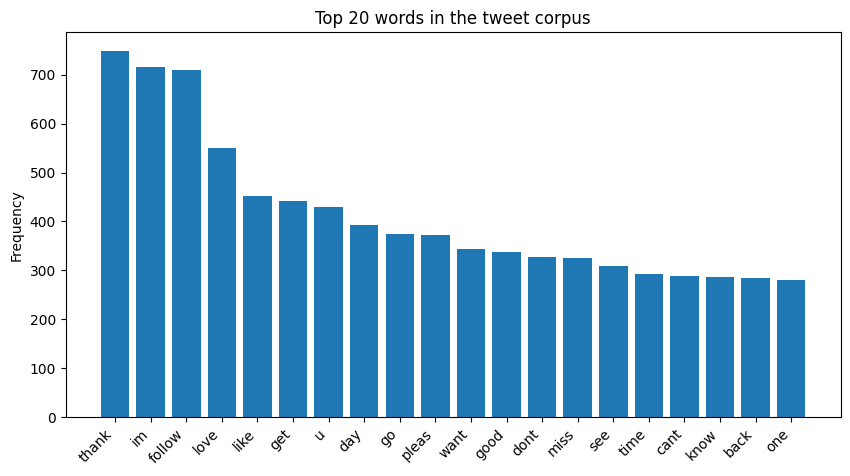

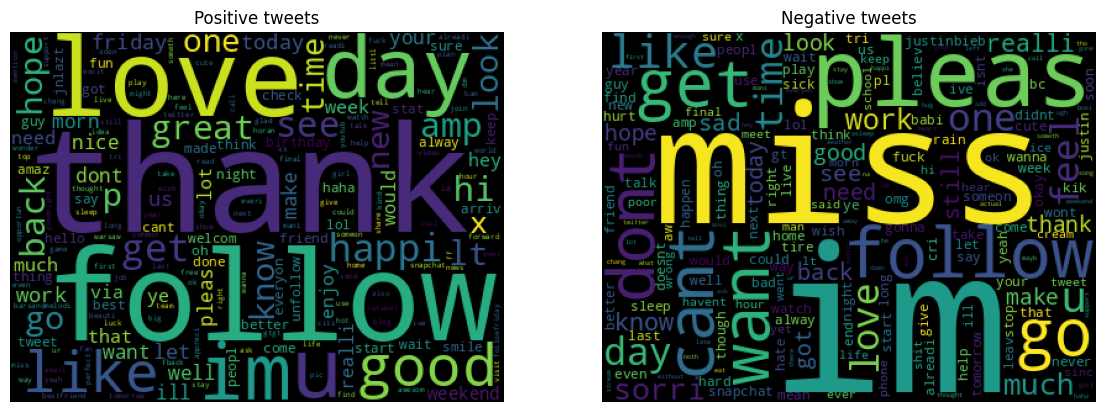

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Aggregate counts ignoring sentiment
from collections import Counter
all_words = Counter()
for (w, y), c in freqs.items():
    all_words[w] += c

top20 = all_words.most_common(20)

# Bar chart
plt.figure(figsize=(10,5))
words, counts = zip(*top20)
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 words in the tweet corpus")
plt.ylabel("Frequency")
plt.show()

# Word clouds
pos_words = {w:c for (w,y),c in freqs.items() if y==1}
neg_words = {w:c for (w,y),c in freqs.items() if y==0}

fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].imshow(WordCloud(width=400, height=300).generate_from_frequencies(pos_words))
ax[0].axis('off')
ax[0].set_title('Positive tweets')

ax[1].imshow(WordCloud(width=400, height=300).generate_from_frequencies(neg_words))
ax[1].axis('off')
ax[1].set_title('Negative tweets')
plt.show()

**Interpretation tips:**  
* Common neutral tokens (e.g., “love”) may appear in both clouds.  
* Compare *relative* prominence, not absolute counts.  
* Notice slang or emojis that differ by sentiment – an early cue for building classifiers.

---  
🎉 **You’ve visualised word frequencies from scratch!**  
Feel free to tweak the code and explore further.  
Next lesson: we’ll build a **Logistic Regression classifier** using these frequencies as features.